In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import accuracy_score

In [396]:
ls

HW1.pages*               adaline.ipynb            madaline.csv
NNDL-HW1.pdf             data.txt                 madaline.ipynb
README.md                linear-perceptron.ipynb  perceptron.csv


In [397]:
df = pd.read_csv('madaline.csv', names=['x1', 'x2', 'y'])
df['y'] = df['y'].replace(0, -1)

In [398]:
print(df.shape)
df.head(3)

(200, 3)


,x1,x2,y
0,0.459694,-0.470583,-1.0
1,0.797385,-0.343030,-1.0
2,0.235270,0.961296,-1.0


<AxesSubplot:xlabel='x1', ylabel='x2'>

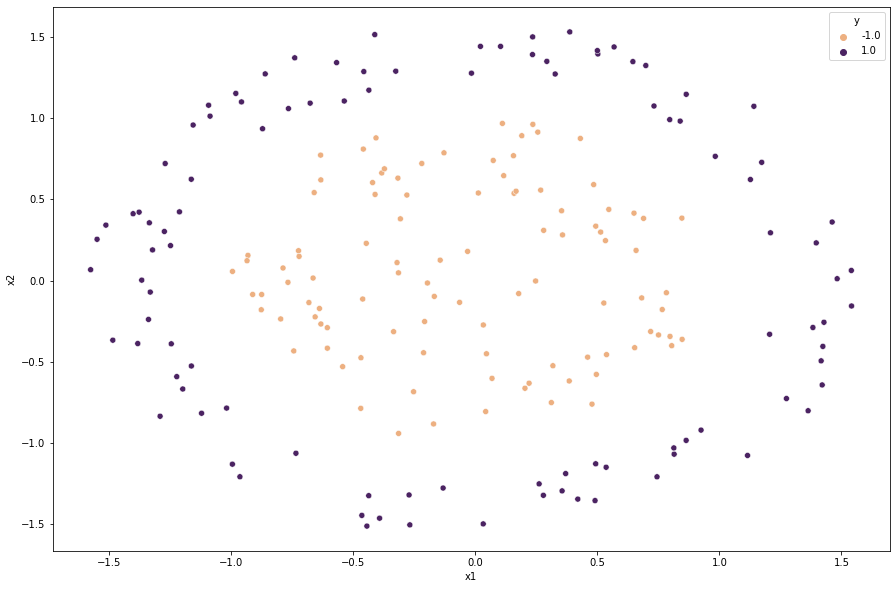

In [399]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='x1', y='x2', hue='y', palette='flare')

In [400]:
def forward_pass_hidden(inputs, W, B):
    net = np.dot(W, inputs) + B
    h = np.where(net >= 0, 1, -1)
    return net, h

In [418]:
def forward_pass_output(inputs):
#     net = sum(inputs) * .25 + .5
#     h = np.where(net >= 0, 1, -1)
    if all(inputs == -1):
        return -1
    else:
        return 1

In [419]:
def init(n_neurons, X_train, y_train, reset_state):
    global seed_W
    global seed_B
    y = np.empty_like(y_train)
    if (seed_W == None and seed_B == None) or reset_state:
        seed_W = np.random.get_state()
        W = np.random.uniform(-.05, .05, [n_neurons, X_train.shape[1]])
        seed_B = np.random.get_state()
        B = np.random.normal(-.05, .05, size=(n_neurons))
    else: 
        np.random.set_state(seed_W)
        W = np.random.uniform(-.05, .05, [n_neurons, X_train.shape[1]])
        np.random.get_state(seed_B)
        B = np.random.normal(-.05, .05, size=(n_neurons))
    return y, W, B

In [433]:
def train_perceptron(X_train, y_train, max_epochs, n_neurons):
    lr = .01
    
    y, W, B = init(n_neurons, X_train, y_train, False)
    epochs = 0
    while True:
        errors = []
        epochs += 1
        weights_updated = False
        for index in X_train.index:

            net_hidden, h_hidden = forward_pass_hidden(X_train.loc[index], W, B)

            h_output = forward_pass_output(h_hidden)

            
            y[index] = h_output
            if h_output == y_train.loc[index]:
                continue


            elif h_output == 1:
                for arg in range(n_neurons):
                    if net_hidden[arg] > 0:
                        W[arg] += lr * (-1 - net_hidden[arg]) * X_train.loc[index]
                        B[arg] += lr * (-1 - net_hidden[arg])
                        weights_updated = True
            elif h_output == -1:
                zz = abs(net_hidden)
                arg = np.argsort(zz)[0]
                W[arg] += lr * (1 - net_hidden[arg]) * X_train.loc[index]
                B[arg] += lr * (1 - net_hidden[arg])
                weights_updated = True
        if not weights_updated:
            print('reached the answer in {} epochs'.format(epochs))
            break
        if epochs > max_epochs:
            y, W, B = init(n_neurons, X_train, y_train, True)
            epochs = 0
    score = accuracy_score(y_train, y)
    return W, B, score, y, epochs

In [434]:
def plot_dividing_lines(x, y, ax, points):
    sns.scatterplot(data=points, x='x1', y='x2', alpha=0.8, hue='y', palette='flare', ax=ax)
    sns.lineplot(x=x, y=y, color='black', ax=ax)

In [435]:
def find_misclassifieds(W, X_train, y_train):
    misclassified_indices = []
    for index in X_train.index:
        net, h = forward_pass(X_train.loc[index], W)
        if h != y_train.loc[index]:
            misclassified_indices.append(index)
    return misclassified_indices

In [436]:
def draw_lines(W, B, df, score, ax=None):
    if not ax:
        plt.figure(figsize=(15, 10))
        ax = plt.subplot(111)
    x1_min, x1_max = min(df['x1']), max(df['x1'])
    x = np.linspace(x1_min, x1_max, num=10000)
    for i in range(W.shape[0]):
        y = -(W[i][0]*x + B[i]) / W[i][1]
        plot_dividing_lines(x, y, ax, df)

    ax.set_title('accuracy score {}%'.format(score * 100))
    ax.get_legend().remove()
    ax.set_ylim((-2, 2))

In [440]:
max_epochs = 50
X_train = df[['x1', 'x2']]
y_train = df['y']

In [441]:
seed_W = None
seed_B = None

reached the answer in 43 epochs


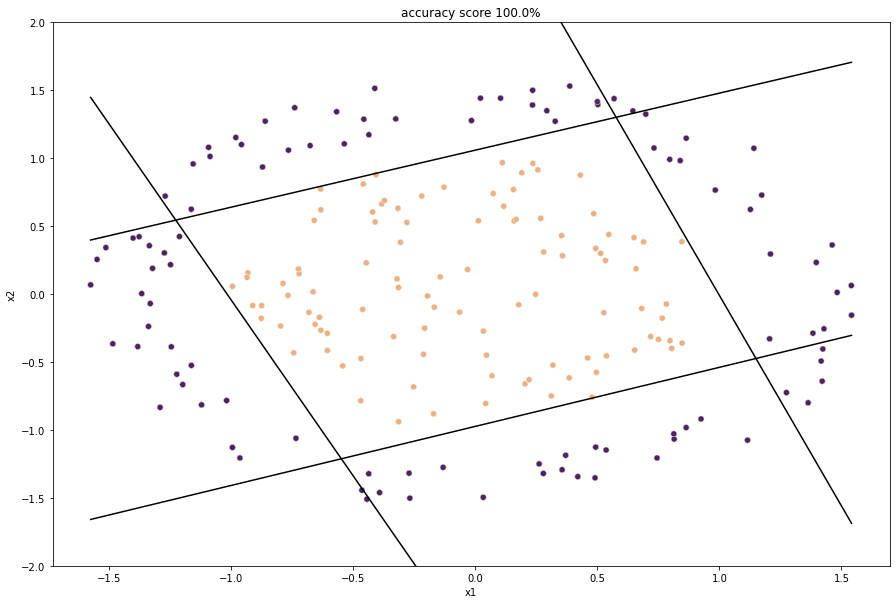

In [442]:
n_neurons = 4

W, B, score, y, _ = train_perceptron(X_train, y_train, max_epochs, n_neurons)
draw_lines(W, B, df, score)

reached the answer in 29 epochs


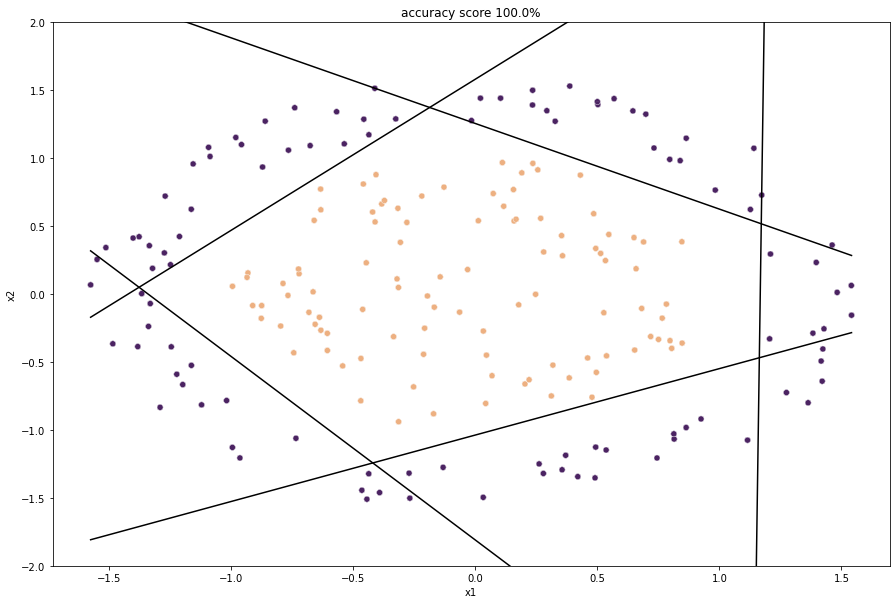

In [443]:
n_neurons = 6

W, B, score, y, _ = train_perceptron(X_train, y_train, max_epochs, n_neurons)
draw_lines(W, B, df, score)

reached the answer in 25 epochs


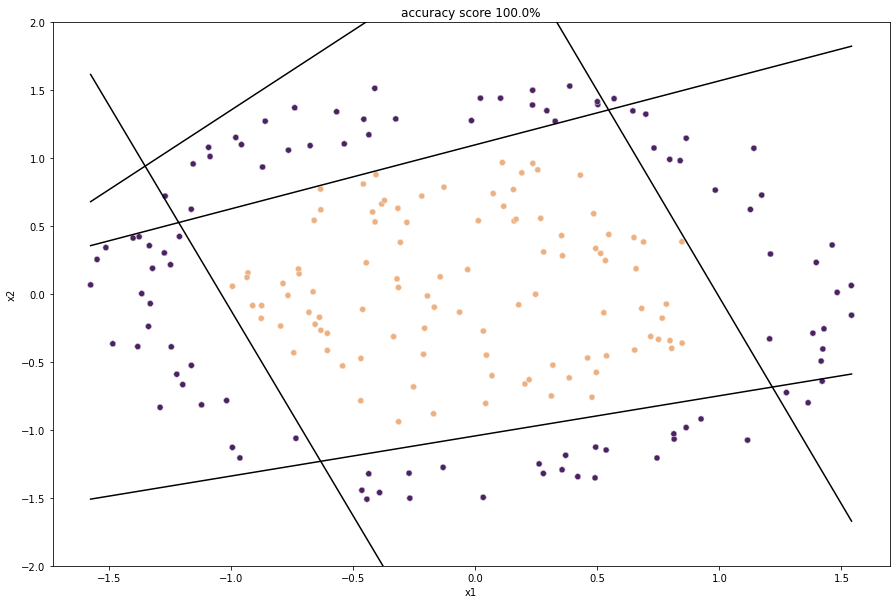

In [444]:
n_neurons = 8

W, B, score, y, _ = train_perceptron(X_train, y_train, max_epochs, n_neurons)
draw_lines(W, B, df, score)

reached the answer in 43 epochs
reached the answer in 29 epochs
reached the answer in 25 epochs


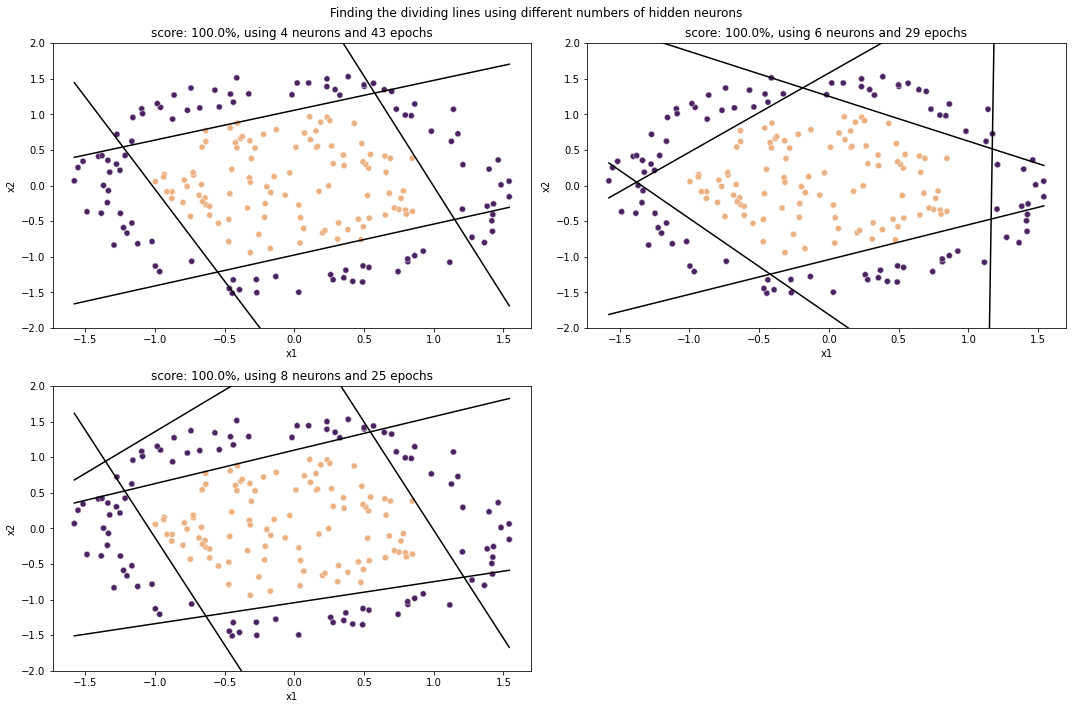

In [445]:
plt.figure(figsize=(15, 10))

for k, n_neurons in enumerate([4, 6, 8]):
    ax = plt.subplot(2, 2, k + 1)
    W, B, score, y, epochs = train_perceptron(X_train, y_train, max_epochs, n_neurons)
    draw_lines(W, B, df, score, ax)
    ax.set_title('score: {}%, using {} neurons and {} epochs'.format(score*100, n_neurons, epochs))

plt.suptitle('Finding the dividing lines using different numbers of hidden neurons')
plt.tight_layout()